###Basic Portfolio optimisation using Efficient Frontier on a portfolio based on key stocks from BSE ###
A basic portfolio optimisation using PyPortfolioOpt library. Optimised using Sharpe ratio.A lot of assumptions are made to simplify calculations.

In [0]:
#Libraries for data analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_datareader import data as web
from datetime import datetime
plt.style.use('fivethirtyeight')

In [0]:
df=pd.DataFrame()
today=datetime.today().strftime('%Y-%m-%d')
#Defining portfolio stocks
stocks=['INFY.BO','CIPLA.BO','TCS.BO','RELIANCE.BO','BHARTIARTL.BO','TATASTEEL.BO','TITAN.BO','APTECHT.BO','CRISIL.BO','VIPIND.BO']
#Starting with equal allocation to all
weights=np.array([0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2])

In [0]:
#Reading stock price data
for stock in stocks:
  df[stock]=web.DataReader(stock,data_source='yahoo',start='2015-06-05',end=today)['Adj Close']

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


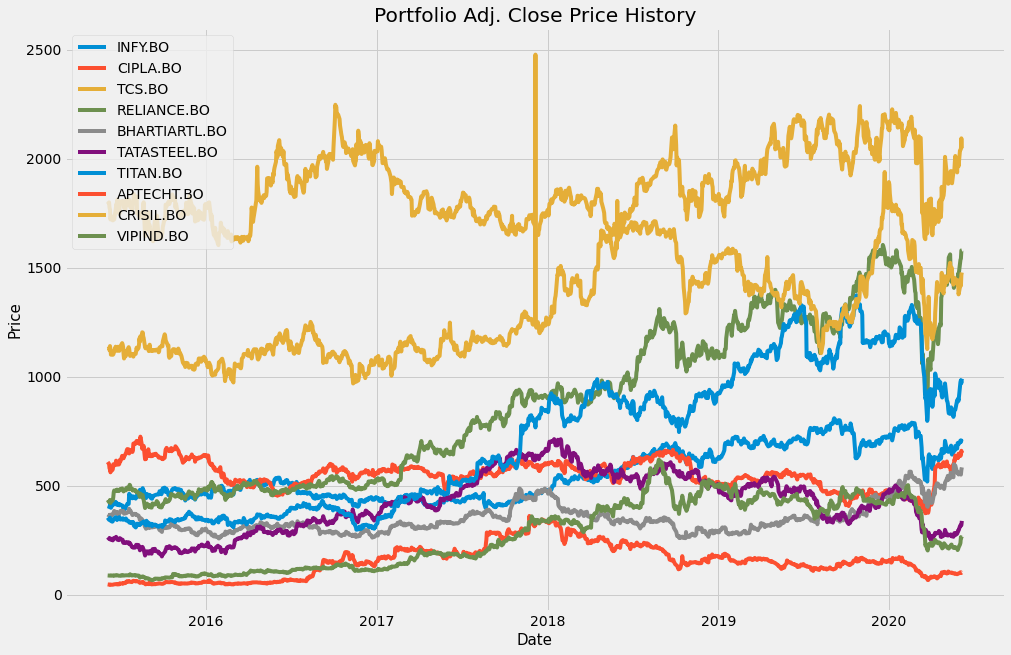

In [5]:
#Plot of historical prices
plt.figure(figsize=(15,10))
title='Portfolio Adj. Close Price History'
for stock in df.columns.values:
  plt.plot(df[stock],label=stock)
plt.title(title)
plt.xlabel('Date',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.legend(df.columns.values,loc='best')
plt.show()

In [6]:
#Daily returns from the past 10 days
returns=df.pct_change()
returns[-10:]

,INFY.BO,CIPLA.BO,TCS.BO,RELIANCE.BO,BHARTIARTL.BO,TATASTEEL.BO,TITAN.BO,APTECHT.BO,CRISIL.BO,VIPIND.BO
Date,,,,,,,,,,
2020-05-22,0.030134,0.036580,0.013758,-0.005868,-0.002103,-0.032264,-0.000294,-0.023127,-0.005058,-0.013860
2020-05-26,-0.017479,-0.017449,-0.037445,-0.005518,-0.057083,0.022044,0.051445,-0.022131,-0.002905,-0.007834
2020-05-27,0.036977,0.008043,0.031775,0.016331,0.006885,0.026560,-0.007054,0.018947,-0.013076,-0.044357
2020-05-28,0.002765,-0.007268,0.000050,0.017762,-0.000533,0.025004,0.014602,0.003616,0.013636,0.021871
2020-05-29,-0.009172,0.030718,-0.016781,-0.005059,-0.018305,0.000169,-0.010225,0.009779,-0.044241,0.034483
2020-06-01,0.011789,-0.008570,0.037077,0.037708,0.012038,0.067242,0.076072,0.034149,0.024414,0.062988
2020-06-02,0.012223,-0.007165,0.001100,0.010293,-0.001878,0.013490,0.018156,0.020700,0.024080,0.032439
2020-06-03,-0.009463,0.006275,0.002180,0.004134,-0.011290,-0.006577,0.008455,-0.000483,-0.019572,0.107876
2020-06-04,0.009197,0.030322,0.023737,0.024312,0.038880,0.009300,-0.012754,-0.024638,0.035658,-0.005672


In [7]:
#Calculate annualized covariance
# daily return *Number of trade days annualy
annualized_covariance=returns.cov() * 252
annualized_covariance

,INFY.BO,CIPLA.BO,TCS.BO,RELIANCE.BO,BHARTIARTL.BO,TATASTEEL.BO,TITAN.BO,APTECHT.BO,CRISIL.BO,VIPIND.BO
INFY.BO,0.078681,0.011477,0.037182,0.022704,0.019816,0.024697,0.016610,0.027427,0.015423,0.015244
CIPLA.BO,0.011477,0.073799,0.010627,0.020521,0.018021,0.031208,0.018459,0.031827,0.013856,0.017770
TCS.BO,0.037182,0.010627,0.318771,0.023316,0.005661,0.031263,0.008250,0.010275,0.003776,0.014588
RELIANCE.BO,0.022704,0.020521,0.023316,0.089671,0.031341,0.047436,0.030441,0.039301,0.019814,0.035072
BHARTIARTL.BO,0.019816,0.018021,0.005661,0.031341,0.115852,0.037751,0.023701,0.035506,0.017145,0.023804
TATASTEEL.BO,0.024697,0.031208,0.031263,0.047436,0.037751,0.151106,0.040258,0.073674,0.027474,0.049951
TITAN.BO,0.016610,0.018459,0.008250,0.030441,0.023701,0.040258,0.113127,0.044438,0.016795,0.042381
APTECHT.BO,0.027427,0.031827,0.010275,0.039301,0.035506,0.073674,0.044438,0.316588,0.020503,0.072123
CRISIL.BO,0.015423,0.013856,0.003776,0.019814,0.017145,0.027474,0.016795,0.020503,0.076676,0.021583
VIPIND.BO,0.015244,0.017770,0.014588,0.035072,0.023804,0.049951,0.042381,0.072123,0.021583,0.181182


In [8]:
#Calculate the portfolio variance
portfolio_variance=np.dot(weights.T,np.dot(annualized_covariance,weights))
portfolio_variance

0.15665735081793175

In [9]:
#Calculate portfolio standard deviation
portfolio_std_deviation=np.sqrt(portfolio_variance)
portfolio_std_deviation

0.3957996346864557

In [30]:
#Annual portfolio return
portfolio_return=np.sum(returns.mean()*weights) * 252
portfolio_return

0.3875536739817362

In [0]:
percent_var=str(round(portfolio_variance,2)*100)+'%'
percent_sd=str(round(portfolio_std_deviation,2)*100)+'%'
percent_return=str(round(portfolio_return,2)*100)+'%'

In [32]:
print('Expected Annual return:',percent_return)
print('Expected Risk (SD):',percent_sd)
print('Expected Variance:',percent_var)

Expected Annual return: 39.0%
Expected Risk (SD): 40.0%
Expected Variance: 16.0%


In [13]:
pip install PyPortFolioOpt

In [0]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

####Portfolio Optimisation

In [77]:
#Expected return and standard deviation
mu=expected_returns.mean_historical_return(df)
s=risk_models.sample_cov(df)

#Efficient frontier calculation
ef=EfficientFrontier(mu,s)
weights_new=ef.max_sharpe()
allocation=ef.clean_weights()
allocation

{'APTECHT.BO': 0.05018,
 'BHARTIARTL.BO': 0.0,
 'CIPLA.BO': 0.0,
 'CRISIL.BO': 0.0,
 'INFY.BO': 0.06609,
 'RELIANCE.BO': 0.4297,
 'TATASTEEL.BO': 0.0,
 'TCS.BO': 0.09029,
 'TITAN.BO': 0.2149,
 'VIPIND.BO': 0.14885}

In [26]:
ef.portfolio_performance(verbose=True)

Expected annual return: 28.6%
Annual volatility: 22.7%
Sharpe Ratio: 1.17


(0.2859935027125326, 0.2266849638402925, 1.1734060266120445)

In [0]:
from pypfopt.plotting import Plotting as pfplot

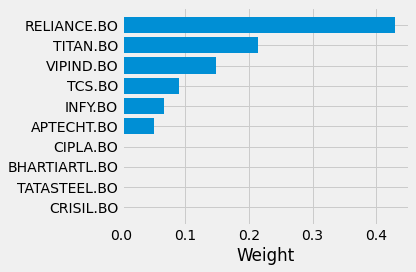

In [78]:
#Plot portfolio allcoation
pfplot.plot_weights(allocation)